<a href="https://colab.research.google.com/github/KrishnaSolo/ML/blob/master/a2___Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 784)               4240656   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 4,248,954
Trainable params:

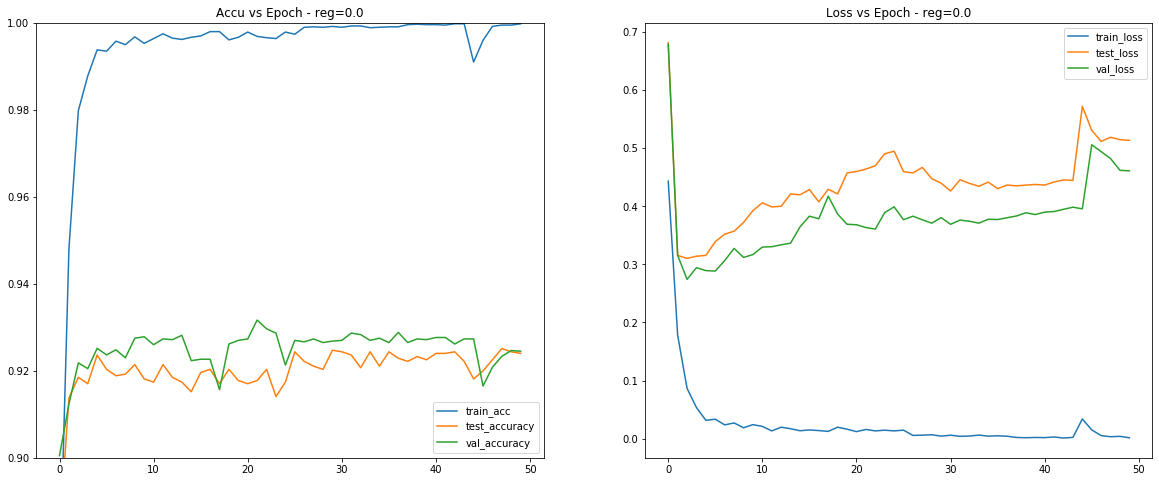

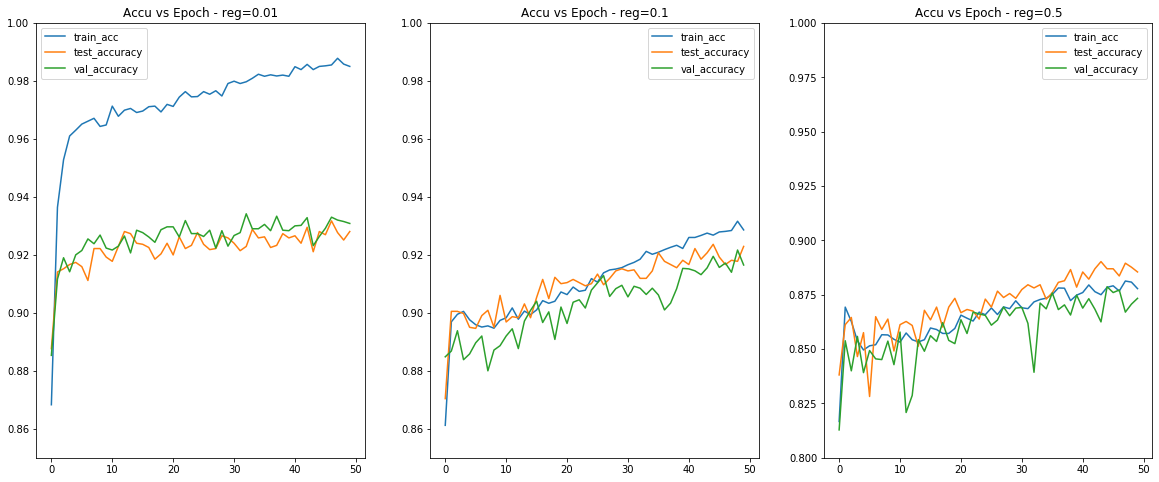

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 784)               4240656   
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

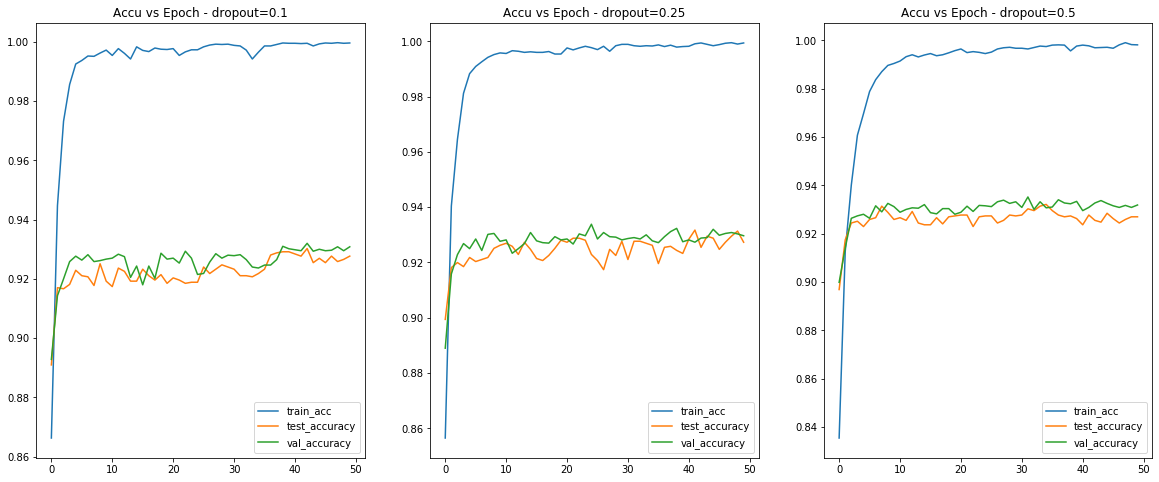

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

# Load the data
def loadData():
    with np.load("notMNIST.npz") as data:
        Data, Target = data["images"], data["labels"]
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data = Data[randIndx] / 255.0
        Target = Target[randIndx]
        trainData, trainTarget = Data[:10000], Target[:10000]
        validData, validTarget = Data[10000:16000], Target[10000:16000]
        testData, testTarget = Data[16000:], Target[16000:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

# Implementation of a neural network using only Numpy - trained using gradient descent with momentum
def convertOneHot(trainTarget, validTarget, testTarget):
    newtrain = np.zeros((trainTarget.shape[0], 10))
    newvalid = np.zeros((validTarget.shape[0], 10))
    newtest = np.zeros((testTarget.shape[0], 10))

    for item in range(0, trainTarget.shape[0]):
        newtrain[item][trainTarget[item]] = 1
    for item in range(0, validTarget.shape[0]):
        newvalid[item][validTarget[item]] = 1
    for item in range(0, testTarget.shape[0]):
        newtest[item][testTarget[item]] = 1
    return newtrain, newvalid, newtest


def shuffle(trainData, trainTarget):
    np.random.seed(421)
    randIndx = np.arange(len(trainData))
    target = trainTarget
    np.random.shuffle(randIndx)
    data, target = trainData[randIndx], target[randIndx]
    return data, target


def relu(x):
    # TODO
    return np.maximum(0,x)

def softmax(x):
    # TODO
    num = np.exp(x)
    den = np.sum(num)
    return num/den


def computeLayer(X, W, b):
    # TODO
    pred = np.dot(W,X) + b;
    return pred

def CE(target, prediction):
    # TODO
    N = np.shape(target)
    CE = -(target*np.log(prediction))
    return CE/N
    

def gradCE(target, prediction):
    # TODO
    N = np.shape(target)
    grad = prediction - target
    return grad/N

def part2(reg):
    #train using conv and pool
    trainData, validData, testData, a, b, c = loadData()
    validData = validData.reshape(-1,28, 28, 1)
    testData = testData.reshape(-1,28, 28, 1)
    trainData = trainData.reshape(-1,28, 28, 1)
    #print(n)
    trainTarget, validTarget, testTarget = convertOneHot(a,b,c)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=(28, 28,1),
                             use_bias=True,kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(784, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg), 
                            use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'),
      tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(reg), 
                            use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    #train and test model

    test_loss, test_acc = model.evaluate(testData, testTarget)

    print(test_acc)
    return model, trainData, validData, testData, trainTarget, validTarget, testTarget

def part2b(reg,prob):
    #train using conv and pool
    trainData, validData, testData, a, b, c = loadData()
    validData = validData.reshape(-1,28, 28, 1)
    testData = testData.reshape(-1,28, 28, 1)
    trainData = trainData.reshape(-1,28, 28, 1)
    #print(n)
    trainTarget, validTarget, testTarget = convertOneHot(a,b,c)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', input_shape=(28, 28,1),
                             use_bias=True,kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(784, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(reg), 
                            use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'),
      tf.keras.layers.Dropout(prob),
      tf.keras.layers.Dense(10, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(reg), 
                            use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    #train and test model

    test_loss, test_acc = model.evaluate(testData, testTarget)

    print(test_acc)
    return model, trainData, validData, testData, trainTarget, validTarget, testTarget

x, xtrainData, xvalidData, xtestData, xtrainTarget, xvalidTarget, xtestTarget = part2(0.0)
x1, xtrainData, xvalidData, xtestData, xtrainTarget, xvalidTarget, xtestTarget = part2(0.0)
y, ytrainData, yvalidData, ytestData, ytrainTarget, yvalidTarget, ytestTarget = part2(0.01)
y1, ytrainData, yvalidData, ytestData, ytrainTarget, yvalidTarget, ytestTarget = part2(0.01)
z, ztrainData, zvalidData, ztestData, ztrainTarget, zvalidTarget, ztestTarget = part2(0.1)
z1, ztrainData, zvalidData, ztestData, ztrainTarget, zvalidTarget, ztestTarget = part2(0.1)
w, wtrainData, wvalidData, wtestData, wtrainTarget, wvalidTarget, wtestTarget = part2(0.5)
w1, wtrainData, wvalidData, wtestData, wtrainTarget, wvalidTarget, wtestTarget = part2(0.5)

h1a = x.fit(xtrainData, xtrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(xtestData, xtestTarget))
h1b = x1.fit(xtrainData, xtrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(xvalidData, xvalidTarget))

h2a = y.fit(ytrainData, ytrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(ytestData, ytestTarget))
h2b = y1.fit(ytrainData, ytrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(yvalidData, yvalidTarget))

h3a = z.fit(ztrainData, ztrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(ztestData, ztestTarget))
h3b = z1.fit(ztrainData, ztrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(zvalidData, zvalidTarget))

h4a = w.fit(wtrainData, wtrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(wtestData, wtestTarget))
h4b = w1.fit(wtrainData, wtrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(wvalidData, wvalidTarget))

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title("Accu vs Epoch - reg=0.0")
plt.plot(h1a.history['acc'], label='train_acc')
plt.plot(h1a.history['val_acc'], label='test_accuracy')
plt.plot(h1b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='best')

#plt.figure(figsize=(20,8))
plt.subplot(1, 2, 2)
plt.title("Loss vs Epoch - reg=0.0")
plt.plot(h1a.history['loss'], label='train_loss')
plt.plot(h1a.history['val_loss'], label='test_loss')
plt.plot(h1b.history['val_loss'], label='val_loss')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.9, 1])
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title("Accu vs Epoch - reg=0.01")
plt.plot(h2a.history['acc'], label='train_acc')
plt.plot(h2a.history['val_acc'], label='test_accuracy')
plt.plot(h2b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
plt.ylim([0.85, 1])
plt.legend(loc='best')

plt.subplot(1, 3, 2)
plt.title("Accu vs Epoch - reg=0.1")
plt.plot(h3a.history['acc'], label='train_acc')
plt.plot(h3a.history['val_acc'], label='test_accuracy')
plt.plot(h3b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
plt.ylim([0.85, 1])
plt.legend(loc='best')

plt.subplot(1, 3, 3)
plt.title("Accu vs Epoch - reg=0.5")
plt.plot(h4a.history['acc'], label='train_acc')
plt.plot(h4a.history['val_acc'], label='test_accuracy')
plt.plot(h4b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()

y, ytrainData, yvalidData, ytestData, ytrainTarget, yvalidTarget, ytestTarget = part2b(0.0,0.1)
y1, ytrainData, yvalidData, ytestData, ytrainTarget, yvalidTarget, ytestTarget = part2b(0.0,0.1)
z, ztrainData, zvalidData, ztestData, ztrainTarget, zvalidTarget, ztestTarget = part2b(0.0,0.25)
z1, ztrainData, zvalidData, ztestData, ztrainTarget, zvalidTarget, ztestTarget = part2b(0.0,0.25)
w, wtrainData, wvalidData, wtestData, wtrainTarget, wvalidTarget, wtestTarget = part2b(0.0,0.5)
w1, wtrainData, wvalidData, wtestData, wtrainTarget, wvalidTarget, wtestTarget = part2b(0.0,0.5)

h2a = y.fit(ytrainData, ytrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(ytestData, ytestTarget))
h2b = y1.fit(ytrainData, ytrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(yvalidData, yvalidTarget))

h3a = z.fit(ztrainData, ztrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(ztestData, ztestTarget))
h3b = z1.fit(ztrainData, ztrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(zvalidData, zvalidTarget))

h4a = w.fit(wtrainData, wtrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(wtestData, wtestTarget))
h4b = w1.fit(wtrainData, wtrainTarget, epochs=50,batch_size=32,
                shuffle=True, validation_data=(wvalidData, wvalidTarget))

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title("Accu vs Epoch - dropout=0.1")
plt.plot(h2a.history['acc'], label='train_acc')
plt.plot(h2a.history['val_acc'], label='test_accuracy')
plt.plot(h2b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.85, 1])
plt.legend(loc='best')

plt.subplot(1, 3, 2)
plt.title("Accu vs Epoch - dropout=0.25")
plt.plot(h3a.history['acc'], label='train_acc')
plt.plot(h3a.history['val_acc'], label='test_accuracy')
plt.plot(h3b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.85, 1])
plt.legend(loc='best')

plt.subplot(1, 3, 3)
plt.title("Accu vs Epoch - dropout=0.5")
plt.plot(h4a.history['acc'], label='train_acc')
plt.plot(h4a.history['val_acc'], label='test_accuracy')
plt.plot(h4b.history['val_acc'], label='val_accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.ylim([0.8, 1])
plt.legend(loc='best')
plt.show()
